# Visualization
its time to check what the AHEI rankings, what the prediction tell us, and what features were more important.

In [114]:
import pandas as pd
import seaborn as sns
import geopandas as gp
import matplotlib.pyplot as plt

In [7]:
df = pd.read_parquet("data/model_output/forecast.parquet")

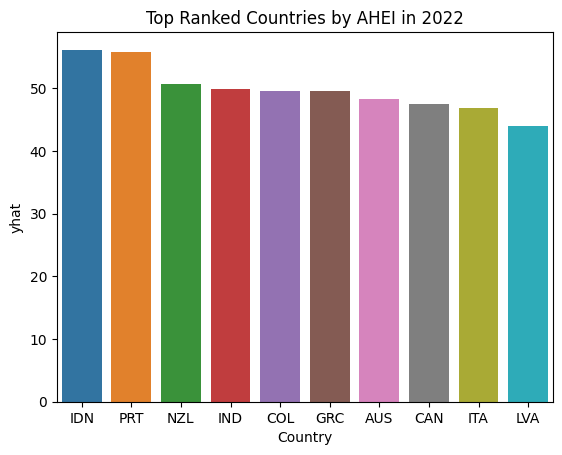

In [22]:
top_2022 = df.query("ds == 2022").sort_values("yhat", ascending=False)[:10]
ax = sns.barplot(top_2022, x="Country", y="yhat").set(title="Top Ranked Countries by AHEI in 2022")

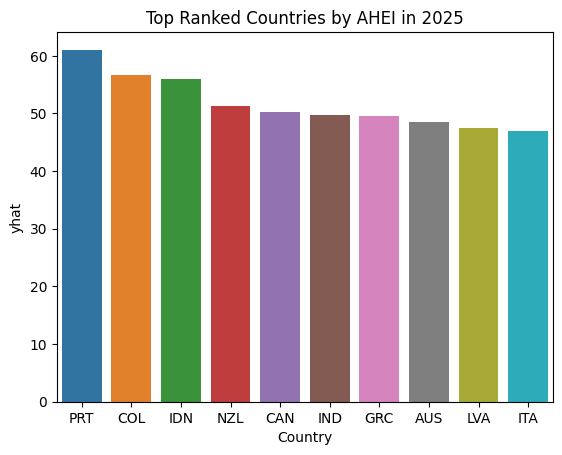

In [118]:
top_2025 = df.query("ds == 2025").sort_values("yhat", ascending=False)[:10]
ax = sns.barplot(top_2025, x="Country", y="yhat").set(title="Top Ranked Countries by AHEI in 2025")

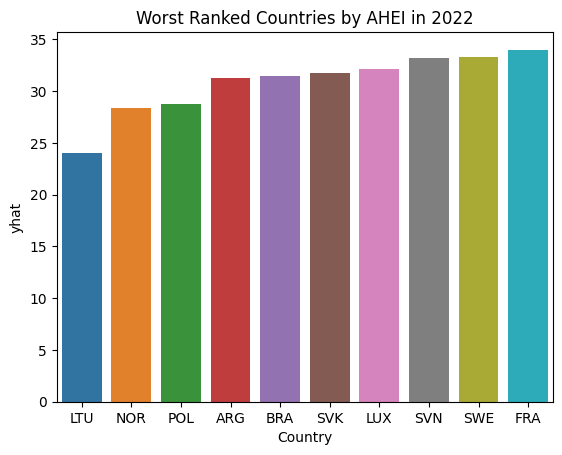

In [21]:
worst_2022 = df.query("ds == 2022").sort_values("yhat", ascending=True)[:10]
ax = sns.barplot(worst_2022, x="Country", y="yhat").set(title="Worst Ranked Countries by AHEI in 2022")

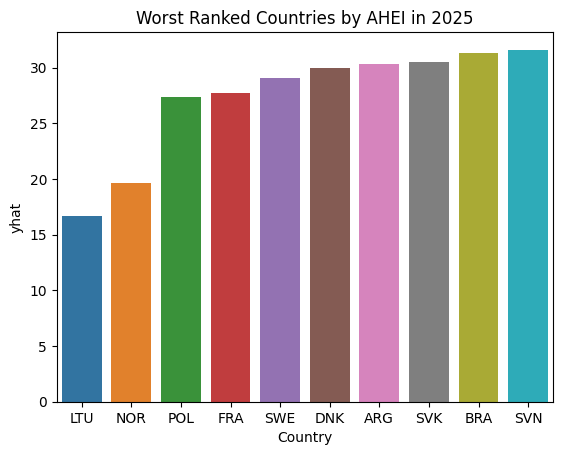

In [119]:
worst_2025 = df.query("ds == 2025").sort_values("yhat", ascending=True)[:10]
ax = sns.barplot(worst_2025, x="Country", y="yhat").set(title="Worst Ranked Countries by AHEI in 2025")

In [23]:
predicted = df[df["y"].isna()]
real = df[~df["y"].isna()]

In [91]:
pred_mean = predicted.groupby("Country").mean()
real_mean = real.groupby("Country").mean()
worsen = (pred_mean["yhat"] < real_mean["y"]).to_frame().reset_index()
improved = worsen[worsen[0] == False]["Country"]
worsen = worsen[worsen[0] == True]["Country"]

In [92]:
worsen_df = pd.DataFrame({"Country": worsen, "Value": 1})

In [93]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))[["iso_a3", "geometry"]].rename(columns={"iso_a3": "Country"})

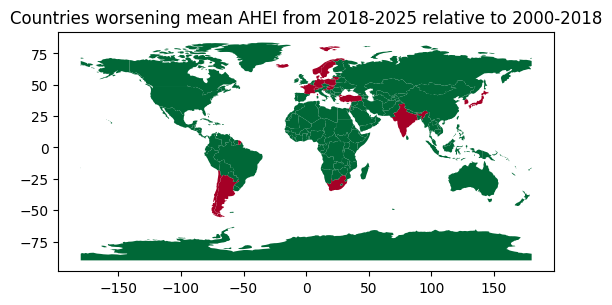

In [98]:
gdf = worsen_df.merge(world, on="Country", how="right").replace(1, 0).fillna(1)
gdf = gp.GeoDataFrame(gdf)
ax = gdf.plot(column="Value", cmap="RdYlGn").set(title="Countries worsening mean AHEI from 2018-2025 relative to 2000-2018")

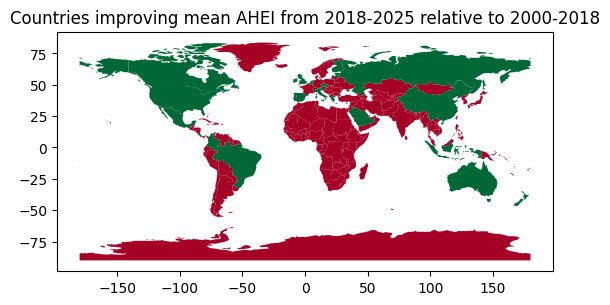

In [122]:
improve_df = pd.DataFrame({"Country": improved, "Value": 1})
gdf = improve_df.merge(world, on="Country", how="right").fillna(0)
gdf = gp.GeoDataFrame(gdf)
ax = gdf.plot(column="Value", cmap="RdYlGn").set(title="Countries improving mean AHEI from 2018-2025 relative to 2000-2018")

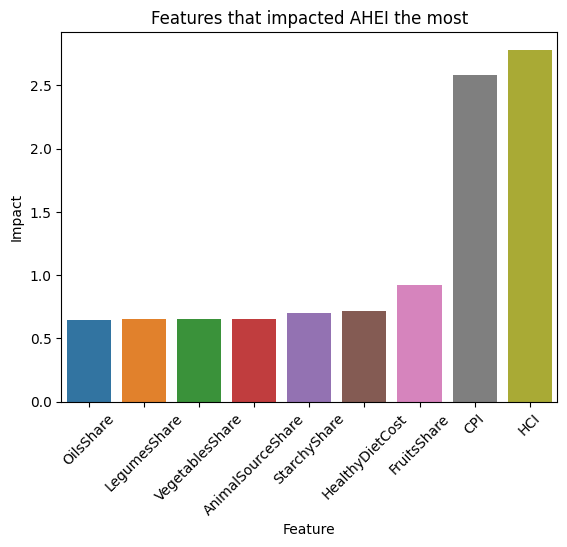

In [117]:
most_important_features = (
    df[[col for col in df.columns if "_" not in col and col not in ["ds", "trend", "y", "yhat", "Country"]]]
    .abs().mean().sort_values().to_frame("Impact").reset_index(names="Feature")
)
ax = sns.barplot(most_important_features, x="Feature", y="Impact").set(title="Features that impacted AHEI the most")
_ = plt.xticks(rotation=45)